# Breast Cancer Classification

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Collection and Processing

In [2]:
# loading the data from the sklearn
breast_cancer_data = sklearn.datasets.load_breast_cancer()

In [3]:
breast_cancer_data.data.shape

(569, 30)

In [4]:
breast_cancer_data.target.shape

(569,)

In [5]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# loading the Data to Dataframe
data_frame = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

In [8]:
# print the dataFrame
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# adding the target column into the dataset
data_frame['target'] = breast_cancer_data.target

In [10]:
# print the number of rows and columns of the data frame
data_frame.shape

(569, 31)

In [11]:
# print the last five rows of the data frame
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [12]:
# getting some information about the dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
# getting the null values in the dataframe
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
# get the statistical values of the dataframe
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
# checking the distribution of the target column
data_frame['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

0 --> malignant

1 --> Benign

In [16]:
data_frame.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Seperating the Features and Target

In [17]:
X = data_frame.drop('target', axis=1)
y = data_frame['target']

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Splitting the data into training and testing set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
print(f"X shape:       {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X shape:       (569, 30)
X_train shape: (455, 30)
X_test shape:  (114, 30)


## Standardize the data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
X_train_std

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

## Building the Neural Network

In [24]:
# importing the tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
# when we training the NN, weights and bias are initilize randomly, through using this above code,
# when we train the model multiple time, we can get the same accuracy and loss for the model
from tensorflow import keras
# we can use keras for building NN with backend of tensorflow or pytorch
# for plot the model
from tensorflow.keras.utils import plot_model

 Setting the random seed in TensorFlow ensures that the initialization of weights and biases, as well as other random operations, are consistent across multiple runs. This helps in achieving reproducible results, such as the same accuracy and loss values each time the model is trained.

In [25]:
def create_model():
    # Setting up the layers of the neural network
    model = keras.Sequential([
        # Flatten the input -> in this layer every units specify the every feature
        keras.layers.Flatten(input_shape=(30,)),
        # First Dense layer with 20 neurons and ReLU activation
        keras.layers.Dense(20, activation='relu'),
        # Output layer with number of classes and softmax activation
        keras.layers.Dense(2, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Plotting the model
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    print("Model architecture plot has been saved to 'model_architecture.png'.")

    return model

Dense is known as a Fully connected layer.

Each neuron in a Dense layer is connected to every neuron in the previous layer, making it a "fully connected" layer.

When working with multiclass classification, we need to encode the target (label) column. Here is an example for digit classification from 0 to 2:

**Labels and One-Hot Encoding:**
* Digit 0 -> class 0 -> [1 0 0]
* Digit 1 -> class 1 -> [0 1 0]
* Digit 2 -> class 2 -> [0 0 1]

**Loss Functions:**

- For the `sparse_categorical_crossentropy` loss function, we provide the labels as integers like 0, 1, and 2.
- For the `categorical_crossentropy` loss function, we provide the labels using one-hot encoding.

For breast cancer classification, which is a binary classification, we can also use sparse_categorical_crossentropy. This loss function expects the labels to be integers (0 or 1). Alternatively, we could use categorical_crossentropy with one-hot encoded labels such as [1, 0] and [0, 1]. Another common choice for binary classification is binary_crossentropy.

**Summary of Loss Functions:**
- **`sparse_categorical_crossentropy`**: Use with integer labels for multiclass classification.
- **`categorical_crossentropy`**: Use with one-hot encoded labels for multiclass classification.
- **`binary_crossentropy`**: Use with binary labels (0 and 1) for binary classification.

By choosing the appropriate loss function, we ensure that the model is trained effectively for the given classification task.

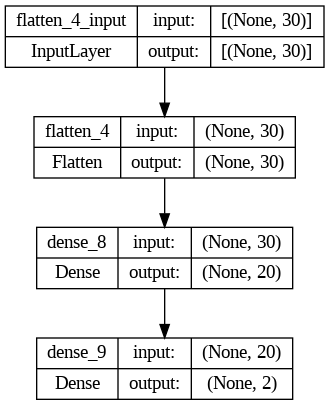

In [51]:
create_model()
from IPython.display import Image
Image('/content/model_architecture.png')

## Train the model

`validation_split`: Here, 10% of the training data will be set aside for validation. The model will not train on this subset; instead, it will use this data to evaluate the model's performance at the end of each epoch.

`epochs`: An epoch means that every sample in the training dataset has had an opportunity to update the internal model parameters once. Training the model for more epochs can help it learn better, but it may also lead to overfitting if trained for too long.

In [26]:
# train the Neural Network for original data
model = create_model()
history_original = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 4s 105ms/step - loss: 8.7309 - accuracy: 0.5477 - val_loss: 4.6476 - val_accuracy: 0.6522
Epoch 2/10
13/13 [==============================] - 0s 32ms/step - loss: 2.1159 - accuracy: 0.7237 - val_loss: 1.3196 - val_accuracy: 0.6739
Epoch 3/10
13/13 [==============================] - 1s 52ms/step - loss: 1.2242 - accuracy: 0.8240 - val_loss: 0.6834 - val_accuracy: 0.8478
Epoch 4/10
13/13 [==============================] - 0s 29ms/step - loss: 0.8028 - accuracy: 0.8240 - val_loss: 0.7677 - val_accuracy: 0.7826
Epoch 5/10
13/13 [==============================] - 0s 25ms/step - loss: 0.5238 - accuracy: 0.8680 - val_loss: 0.5316 - val_accuracy: 0.8478
Epoch 6/10
13/13 [==============================] - 0s 27ms/step - loss: 0.4392 - accuracy: 0.8949 - val_loss: 0.3969 - val_accuracy: 0.8696
Epoch 7/10
13/13 [==============================] - 0s 23ms/step - loss: 0.3833 - accuracy: 0.8973 - val_loss: 0.4411 - val_accuracy: 0.8696
Epoch 8/10
1

In [49]:
create_model()

In [27]:
# Train the model on the standardized data
model_standardized = create_model()
history_standardized = model_standardized.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 36ms/step - loss: 0.7341 - accuracy: 0.4621 - val_loss: 0.5537 - val_accuracy: 0.6304
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 0.5301 - accuracy: 0.7384 - val_loss: 0.3981 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 17ms/step - loss: 0.3978 - accuracy: 0.8826 - val_loss: 0.3045 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.3116 - accuracy: 0.9340 - val_loss: 0.2483 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 14ms/step - loss: 0.2504 - accuracy: 0.9511 - val_loss: 0.2135 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2078 - accuracy: 0.9511 - val_loss: 0.1905 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 0.1755 - accuracy: 0.9584 - val_loss: 0.1753 - val_accuracy: 0.9783
Epoch 8/10
13

## Visualizing the accuracy and loss

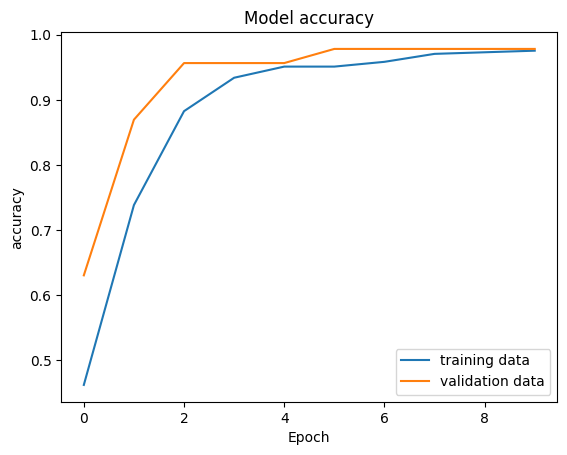

In [28]:
plt.plot(history_standardized.history['accuracy'])
plt.plot(history_standardized.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['training data', 'validation data'], loc='lower right')

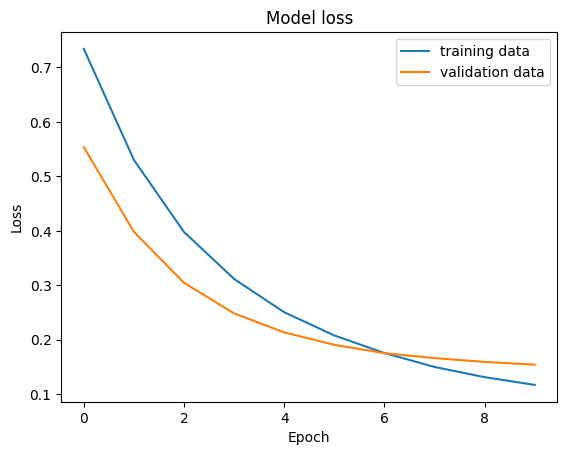

In [29]:
plt.plot(history_standardized.history['loss'])
plt.plot(history_standardized.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training data', 'validation data'], loc='upper right')

## Accuracy of the model for test data

In [30]:
loss, accuracy = model_standardized.evaluate(X_test_std, y_test)
print("Accuracy for test data set: ", accuracy)

4/4 [==============================] - 0s 10ms/step - loss: 0.1651 - accuracy: 0.9561
Accuracy for test data set:  0.9561403393745422


In [31]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[ 0.1318529  -1.22289689  0.22619275 -0.02342069  0.49000614  1.51274076
  0.69035091  0.34062714  1.00887608  1.68985368  0.46502905  0.4984039
  0.89667244  0.15891919  0.96784528  1.47162979  0.71801321  0.62374042
  0.72742307  0.58673486  0.0096267  -1.17235657  0.16795261 -0.15304782
 -0.04232703  0.69426554  0.24403833 -0.07497962 -0.09827233  0.50779424]


In [32]:
y_pred = model_standardized.predict(X_test_std)

4/4 [==============================] - 0s 7ms/step


In [33]:
print(y_pred.shape)
print(y_pred[0])
print(y_test[0])

(114, 2)
[0.41468194 0.585318  ]
0


When `model.predict()` returns the prediction probabilities for each class for a data point, we need to determine the predicted label by identifying the class with the highest probability. To do this, we use the `np.argmax()` function, which takes a list as an argument and returns the index of the maximum element.

In [34]:
# argmax() function
my_list = [10,20,56]
index_of_max = np.argmax(my_list)
print(my_list)
print(index_of_max)

[10, 20, 56]
2


In [35]:
# converting the prediction probality to the class label
y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
print(y_pred)

[[4.14681941e-01 5.85318029e-01]
 [7.46000290e-01 2.53999680e-01]
 [7.01217130e-02 9.29878294e-01]
 [9.20810938e-01 7.91890770e-02]
 [8.02862048e-01 1.97137967e-01]
 [9.24365640e-01 7.56343827e-02]
 [9.95094240e-01 4.90572676e-03]
 [7.86494851e-01 2.13505164e-01]
 [6.21542707e-02 9.37845707e-01]
 [1.49789497e-01 8.50210547e-01]
 [3.75648290e-02 9.62435126e-01]
 [9.80501056e-01 1.94989406e-02]
 [8.50190759e-01 1.49809271e-01]
 [4.54685576e-02 9.54531372e-01]
 [3.61778408e-01 6.38221562e-01]
 [2.81317025e-01 7.18683004e-01]
 [3.71674150e-02 9.62832630e-01]
 [5.73978275e-02 9.42602158e-01]
 [1.01535179e-01 8.98464918e-01]
 [9.84995246e-01 1.50047801e-02]
 [5.78186363e-02 9.42181349e-01]
 [8.54108036e-02 9.14589167e-01]
 [9.91536140e-01 8.46387167e-03]
 [9.73506272e-02 9.02649403e-01]
 [8.82212043e-01 1.17787950e-01]
 [4.51735675e-01 5.48264325e-01]
 [2.56515294e-01 7.43484735e-01]
 [9.90478933e-01 9.52100940e-03]
 [9.99980390e-01 1.95844423e-05]
 [9.37506020e-01 6.24939911e-02]
 [9.994550

In [37]:
print(y_pred_labels)

[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]


## Building the predictive system

In [42]:
def predict_breast_cancer_type(input_data):
  # change the input data into numpy array
  data_np = np.array(input_data)
  print(data_np.shape)
  # reshape the numpy array as predicting one data point
  data_reshaped = data_np.reshape(1,-1)
  print(data_reshaped.shape)
  # standardizing the data
  data_std = scaler.transform(data_reshaped)
  print(data_std)

  # predict the every type's probability
  prediction_prob = model_standardized.predict(data_std)
  print(prediction_prob)

  # Identify the class type
  prediction_label = np.argmax(prediction_prob)
  print(prediction_label)

  # Print the class type
  if(prediction_label == 0):
    print("The tumer is Malignant")
  else:
    print("The tumer is Benign")

In [43]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
)
predict_breast_cancer_type(input_data)

(30,)
(1, 30)
[[ 1.0449852  -2.04204886  1.21071766  0.92880416  1.6042785   3.32322717
   2.62486209  2.47684606  2.23192129  2.38281264  2.37676513 -0.55627443
   2.70562489  2.3021841  -0.20202399  1.28377656  0.75062176  0.63488336
   1.15071528  0.85750603  1.79067831 -1.3331242   2.19314572  1.88185858
   1.35624586  2.64770103  2.15534286  2.23398285  2.91974228  2.12074853]]
1/1 [==============================] - 0s 22ms/step
[[0.9989042  0.00109573]]
0
The tumer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
predict_breast_cancer_type((12.32,12.39,78.85,464.1,0.1028,0.06981,0.03987,0.037,0.1959,0.05955,0.236,0.6656,1.67,17.43,0.008045,0.0118,0.01683,0.01241,0.01924,0.002248,13.5,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
))

(30,)
(1, 30)
[[-0.52394212 -1.58468901 -0.54965134 -0.55350817  0.46815766 -0.67891081
  -0.62090093 -0.31979726  0.54242941 -0.47247634 -0.61554772 -0.97365332
  -0.59330553 -0.5012765   0.33630556 -0.77376877 -0.51596296  0.08410382
  -0.15423412 -0.56865188 -0.58139491 -1.60213143 -0.61138767 -0.59054092
   0.28701433 -0.83757447 -0.72484604 -0.32723302 -0.09827233 -0.95781709]]
1/1 [==============================] - 0s 24ms/step
[[0.01857146 0.9814285 ]]
1
The tumer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
